In [1]:
import ROOT
from ROOT import larlite
from ROOT import TFile
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc as smp
%matplotlib inline

In [2]:
f_s = TFile("mult_pi0_tmstudy_6cm.root","READ")
f_t = TFile("mult_trk_tmstudy_6cm.root","READ")

#V2 contains results from running first 3 python scriptfrom DC's area
n_rads = 8

trk_mult_v = []
shr_mult_v = []
trk_sec_len_v = []
shr_sec_len_v = []
trk_fir_len_v = []
shr_fir_len_v = []
#rad_all  = [i+1 for i in xrange(0,n_rads)]

s_evts = f_s.tree.GetEntries()
t_evts = f_t.tree.GetEntries()

print s_evts, t_evts

#print "N radS : ", n_rads
#for j in xrange(n_rads):
while True:   
    for i in xrange(s_evts):
        
        getEvt = f_s.tree.GetEntry(i)
        print
        #print "THING: ", len(f_s.tree.length_v)
        l = [ i for i in f_s.tree.length_v ]
        l = sorted(l)
        if len(l) > 1:
            shr_sec_len_v.append(l[-2])
            shr_fir_len_v.append(l[-1])
        elif len(l) == 1:
            shr_fir_len_v.append(l[0])
            shr_sec_len_v.append(0)
        else:
            shr_fir_len_v.append(0)
            shr_sec_len_v.append(0)
            
        shr_mult_v.append(len(l))  

    for k in xrange(t_evts):
        
        getEvt = f_t.tree.GetEntry(k)
        l = [ i for i in f_t.tree.length_v ]
        l = sorted(l)
        if len(l) > 1:
            trk_sec_len_v.append(l[-2])
            trk_fir_len_v.append(l[-1])
        elif len(l) == 1:
            trk_sec_len_v.append(0)
            trk_fir_len_v.append(l[0])
        else:
            trk_sec_len_v.append(0)
            trk_fir_len_v.append(0)

        if trk_fir_len_v[-1] < 4:
            print trk_fir_len_v[-1], k
            
        trk_mult_v.append(len(l))  

        
    break
#lensh = np.array(sh_len_v).reshape(n_rads,s_evts)
#lentr = np.array(tr_len_v).reshape(n_rads,t_evts)

254 331


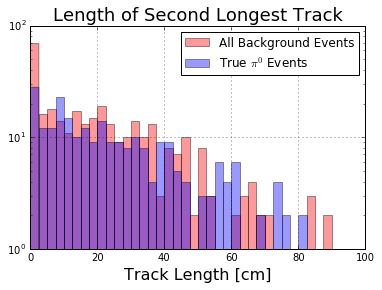

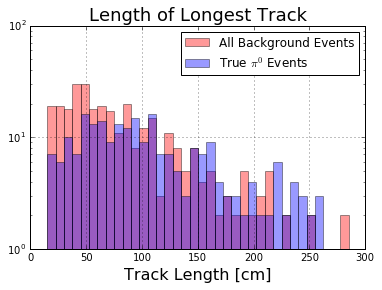

In [3]:
_,_,_=plt.hist(trk_sec_len_v,bins=40,facecolor='red',alpha=0.4,range=[0,100],label="All Background Events")
_,_,_=plt.hist(shr_sec_len_v,bins=40,facecolor='blue',alpha=0.4,range=[0,100],label="True $\\pi^0$ Events")
plt.xlabel("Track Length [cm]",fontsize=16)
plt.legend()
plt.title("Length of Second Longest Track",fontsize=18)
#plt.ylim(0,1000)
plt.grid(True)
plt.yscale('log')
plt.savefig('SecondLongest.png')

plt.figure()
_,_,_=plt.hist(trk_fir_len_v,bins=40,facecolor='red',alpha=0.4,range=[0,300],label="All Background Events")
_,_,_=plt.hist(shr_fir_len_v,bins=40,facecolor='blue',alpha=0.4,range=[0,300],label="True $\\pi^0$ Events")
plt.xlabel("Track Length [cm]",fontsize=16)
plt.legend()
plt.title("Length of Longest Track",fontsize=18)
#plt.ylim(0,1000)
plt.grid(True)
plt.yscale('log')
plt.savefig('Longest.png')


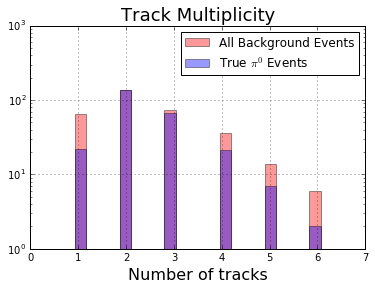

In [73]:
_,_,_=plt.hist(trk_mult_v,bins=30,facecolor='red',alpha=0.4,range=[0,7],label="All Background Events")
_,_,_=plt.hist(shr_mult_v,bins=30,facecolor='blue',alpha=0.4,range=[0,7],label="True $\\pi^0$ Events")
plt.xlabel("Number of tracks",fontsize=16)
plt.legend()
plt.title("Track Multiplicity",fontsize=18)
plt.grid(True)
plt.yscale('log')
plt.savefig('Mult.png')


In [69]:
t =[29,40,47,49,104,143,149,158,162,184,196,221,225,230,247,268,271,306,315,316,320,393,408,417,420,440,441,460,469,476,502,507,514,523,579,583,599,615,627,631,645,689,736,750,757,768,787,790,800,803,805,812,813,825,827,845,854,875,882,893,905,906,912,923,932,938,946,955,956,997,1023,1026,1039,1115,1116,1120,1122,1138,1141,1154,1193,1205,1216,1223,1227,1260,1299,1305,1306,1313,1337,1338,1355,1384,1452,1461,1468,1469,1477,1485,1499,1529,1539,1551,1554,1560,1585,1588,1591,1598,1623,1646,1663,1665,1668,1669,1672,1675,1690,1691,1699,1717,1735,1760,1763,1764,1771,1777,1786,1793,1795,1798,1804,1811,1820,1848,1849,1866,1871,1874,1878,1887,1896,1903,1926,1939,1946,1961,1962,1966,2004,2017,2028,2031,2033,2058,2066,2071,2074,2079,2082,2083,2089,2100,2167,2201,2227,2239,2307,2311,2314,2354,2355,2375,2386,2388,2393,2395,2408,2427,2431,2433,2440,2455,2465,2478,2488,2490,2492,2503,2506,2513,2535,2536,2550,2552,2592,2631,2649,2659,2663,2699,2731,2736,2746,2808,2830,2831,2838,2851,2878,2883,2889,2906,2913,2914,2920,2950,2955,2968,2979,2980,2998,2999,3011,3034,3071,3086,3111,3134,3138,3155,3156,3165,3171,3182,3184,3214,3254,3277,3285,3307,3338,3348,3350,3352,3357,3363,3373,3389,3392,3398,3411,3434,3444,3445,3461,3465,3471,3474,3484,3490,3499,3514,3520,3548,3558,3608,3618,3620,3622,3628,3640,3648,3668,3681,3701,3724,3731,3744,3755,3774,3777,3799,3848,3854,3866,3869,3885,3887,3888,3897,3905,3925,3934,3951,3954,3960,3970,3988,4007,4019,4032,4034,4046,4051,4058,4059,4063,4066,4079,4109,4128,4138,4147,4160,4167,4177,4240,4247,4256,4278,4294,4304,4312,4313,4316,4325,4334,4338,4340]

t[8], t[91]

(162, 1338)

In [ ]:
254 331
0.634946167469 8
0 91
0 134
1.78833973408 150
0 218
2.58381271362 304
In [63]:


In [27]:
def displayData(hit_sh_v,hit_tr_v,display_dim):

    bin_size = 0.05; min_edge = 0; max_edge = 1
    N = (max_edge-min_edge)/bin_size; Nplus1 = N + 1
    bin_list = np.linspace(min_edge, max_edge, Nplus1)
    
    plt.figure(figsize=(30,30))
    for i in xrange(len(rad)):
        
        plt.subplot(display_dim+1,display_dim-1,i+1)
        sig0, bins_s, _ = plt.hist(hit_sh_v[i],bins=bin_list,normed=False,facecolor='blue',alpha=0.5,
                 label="BNB N $\pi0$ events")
        bkgd0, bins_b, _= plt.hist(hit_tr_v[i],bins=bin_list,normed=False,facecolor='red',alpha=0.5,
                 label="BNB track-like events")
        plt.title("Ratio of shrhits : gaushits at Rad = %d [cm]"%rad[i],size=20)
        plt.xlabel("Ratio of Enclosed Shower-like Hits : Gaushits")
        plt.ylabel("Counts")
        plt.legend(loc=0)
        #plt.yscale('log', nonposy='clip')
        plt.ylim(0,9500)
        plt.grid(True)
        s_tot = np.cumsum(sig0)[-1]
        b_tot = np.cumsum(bkgd0)[-1]
    
        #print "Rad ", rad[i], ", Bkgd bins : ", bkgd0
        
        eff = [ float(np.cumsum(sig0[i:])[-1])/s_tot for i in xrange(len(sig0)) ] 
        pur = [ float(np.cumsum(sig0[i:])[-1])/(np.cumsum(sig0[i:])[-1] + np.cumsum(bkgd0[i:])[-1]) for i in xrange(len(bkgd0)) ]
        
        mult = [ eff[i] * pur[i] for i in xrange(len(eff)) ]
        
        bins_ss = [i+bin_size/2 for i in bins_s]
        
        ax2 = plt.twinx()
        plt.plot(bins_ss[:-1],eff,'ko',label="Efficiency")       
        plt.plot(bins_ss[:-1],pur,'go',label="Purity")       
        plt.plot(bins_ss[:-1],mult,'bo',label="Eff * Pur")      
        ax2.set_ylabel('Efficiency', color='k')
        #for tl in ax2.get_yticklabels():
        #   tl.set_color('r')
        ax2.set_ylim(0,1)
    
    plt.savefig("AllRatios.png")
    plt.show()

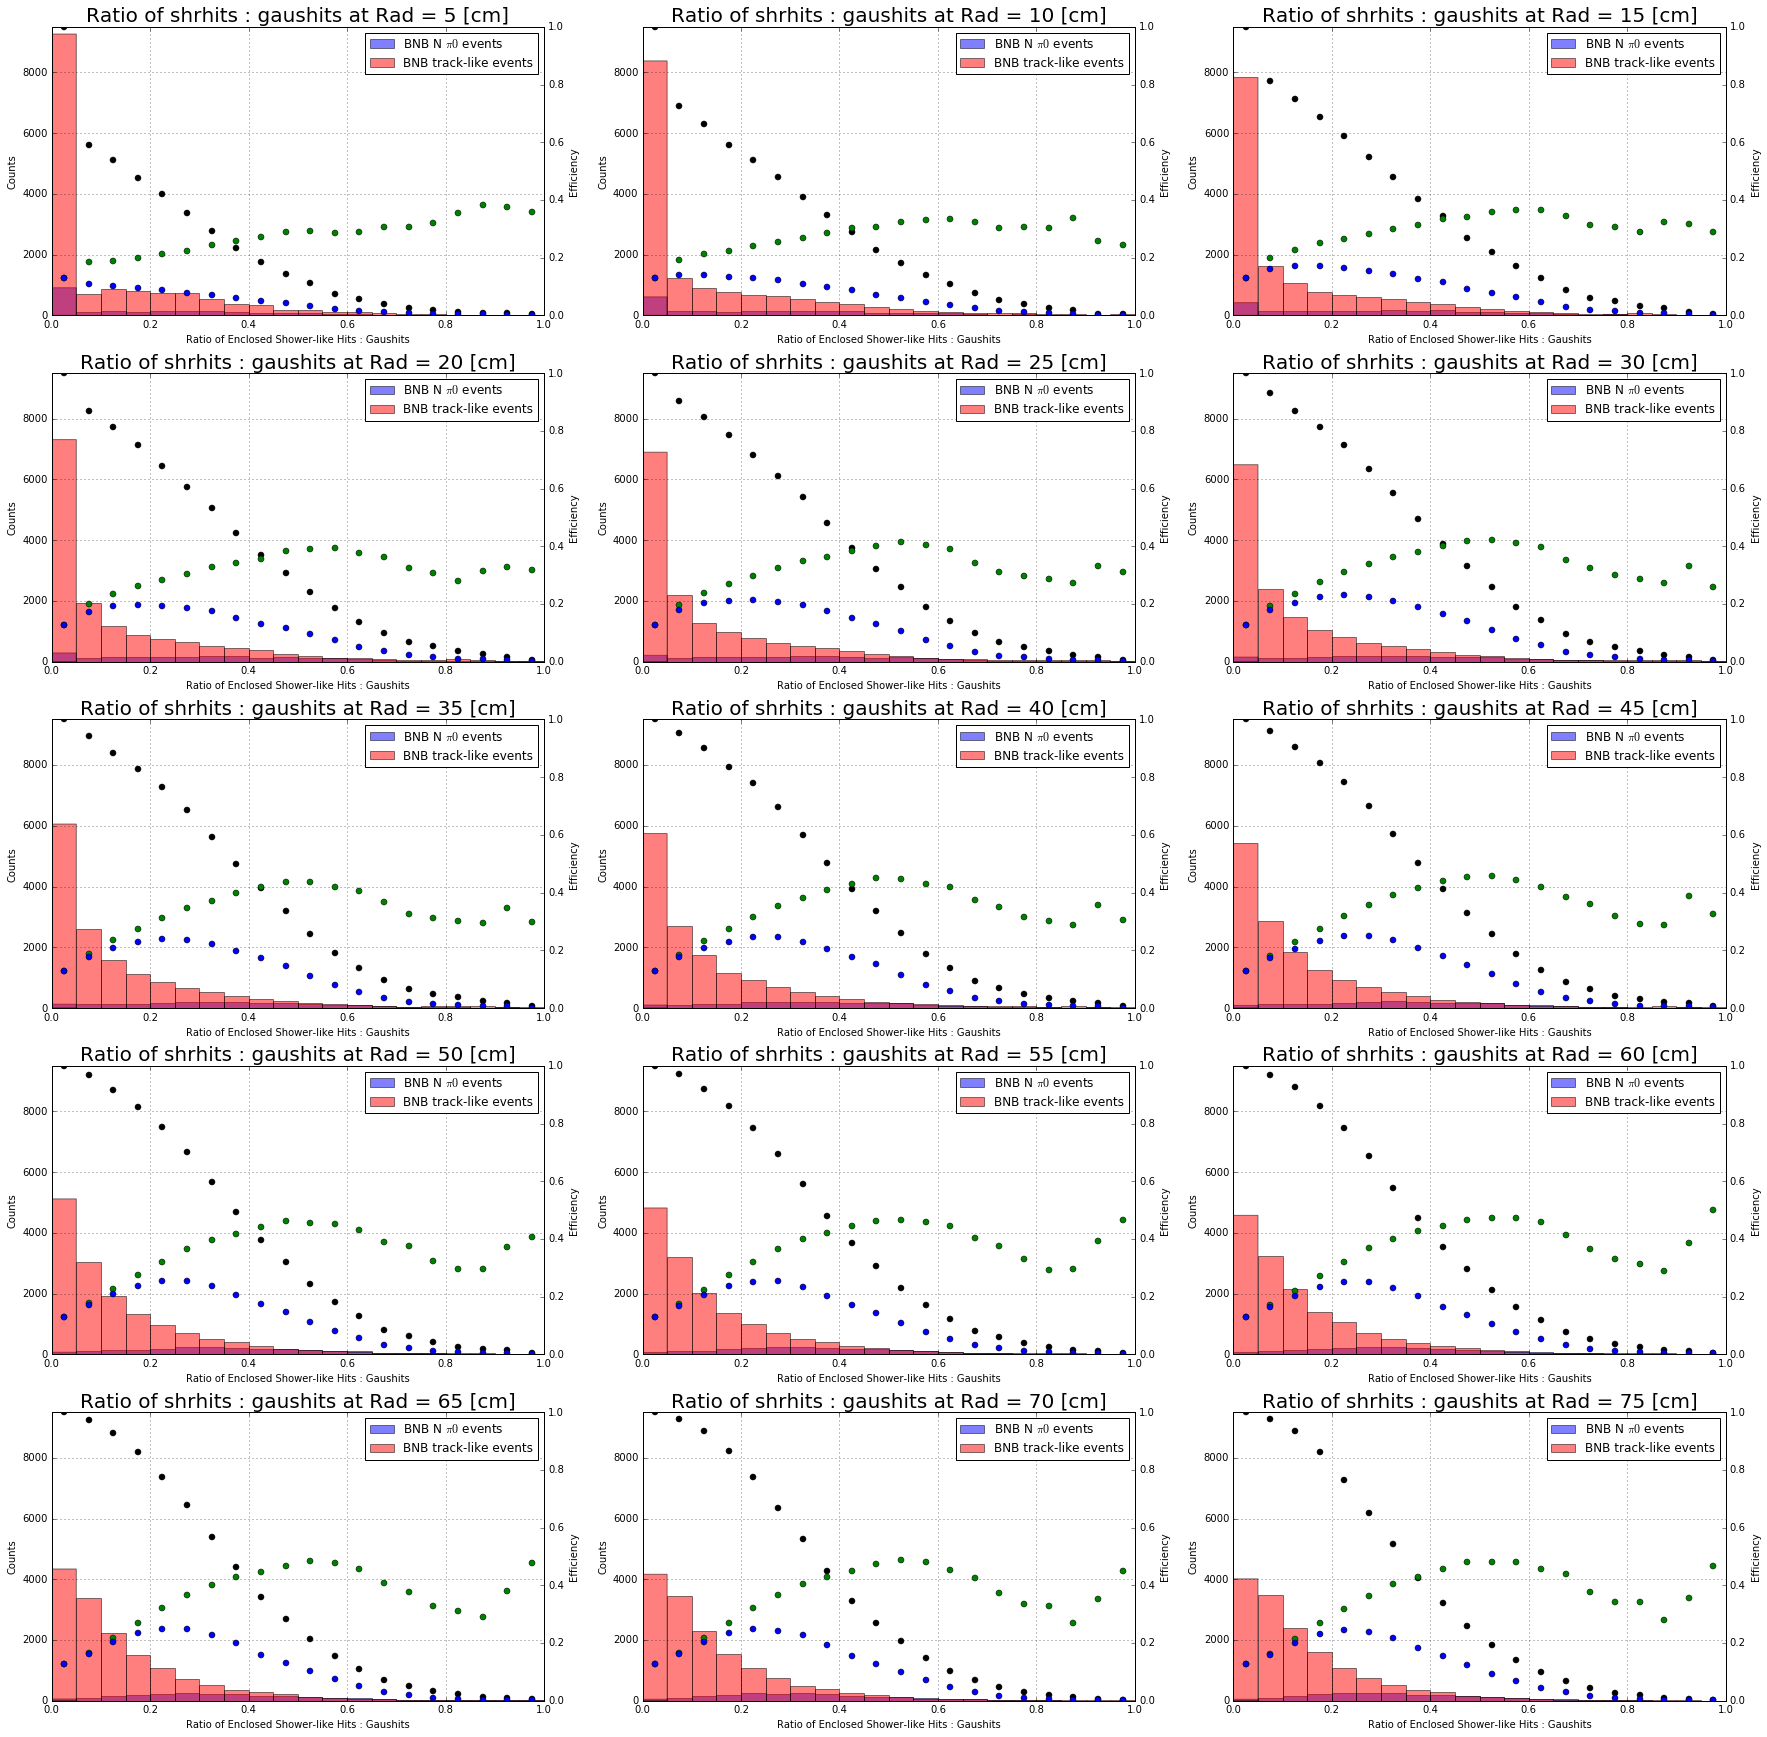

In [28]:
displayData(hits_sh,hits_tr,rad_all,4)

Total sig and back  2225.0 15108.0 20 20
4.73258426966


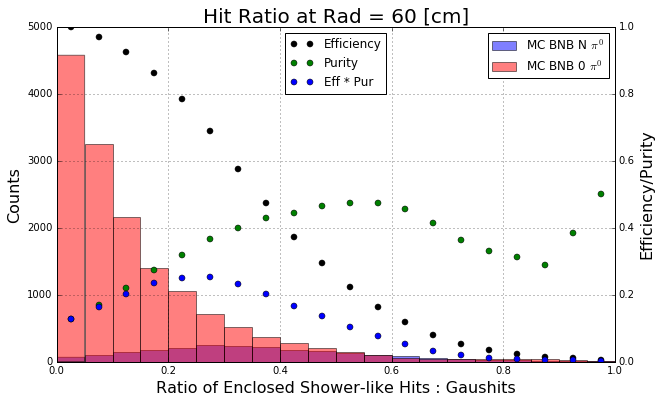

In [24]:
plt.figure(figsize=(10,6))
#for i in xrange(len(rad)/2,len(rad)):
hit_sh_v = hits_sh
hit_tr_v = hits_tr
rad = rad_all

bin_size = 0.05; min_edge = 0; max_edge = 1
N = (max_edge-min_edge)/bin_size; Nplus1 = N + 1
bin_list = np.linspace(min_edge, max_edge, Nplus1)

if True:
 
    if True:
        i =  11
        
        #plt.subplot(display_dim+1,display_dim-1,i+1)
        sig0, bins_s, _ = plt.hist(hit_sh_v[i],bins=bin_list,normed=False,facecolor='blue',alpha=0.5,
                 label="MC BNB N $\pi^0$")
        bkgd0, bins_b, _= plt.hist(hit_tr_v[i],bins=bin_list,normed=False,facecolor='red',alpha=0.5,
                 label="MC BNB 0 $\pi^0$")
        plt.title("Hit Ratio at Rad = %d [cm]"%rad[i],size=20)
        plt.xlabel("Ratio of Enclosed Shower-like Hits : Gaushits",fontsize=16)
        plt.ylabel("Counts",fontsize=16)
        plt.legend(loc=0)
        #plt.ylim(0,30)
        #plt.yscale('log', nonposy='clip')
        plt.grid(True)
        s_tot = np.cumsum(sig0)[-1]
        b_tot = np.cumsum(bkgd0)[-1]
        print "Total sig and back ", s_tot, b_tot, len(sig0), len(bkgd0)
        print float(np.cumsum(bkgd0[1:])[-1])/s_tot
        
        eff = [ float(np.cumsum(sig0[i:])[-1])/s_tot for i in xrange(len(sig0)) ] 
        #pur = [ 1- float(np.cumsum(bkgd0[i:])[-1])/(b_tot+s_tot) for i in xrange(len(bkgd0)) ] 
        pur = [ float(np.cumsum(sig0[i:])[-1])/(np.cumsum(sig0[i:])[-1] + np.cumsum(bkgd0[i:])[-1]) for i in xrange(len(bkgd0)) ] 
        #print pur
        bins_ss = [i+bin_size/2 for i in bins_s]
        
        mult = [ eff[i] * pur[i] for i in xrange(len(eff)) ]
        
        ax2 = plt.twinx()
        plt.plot(bins_ss[:-1],eff,'ko',label="Efficiency")       
        plt.plot(bins_ss[:-1],pur,'go',label="Purity")       
        plt.plot(bins_ss[:-1],mult,'bo',label="Eff * Pur")       
        ax2.set_ylabel('Efficiency/Purity', color='k',fontsize=16)
        ax2.legend(loc=9)
        #ax2.legend(loc='center left', bbox_to_anchor=(1.15, 0.5))
        #for tl in ax2.get_yticklabels():
           #tl.set_color('r')
        #ax2.set_ylim(0.26,0.3)
       
    plt.savefig("separation_withmuon_11117_X.png")
    plt.show()

In [24]:
cut = 5

print "Percent of preserved signal: %.2f " % (np.cumsum(sig0[cut:])[-1] / np.cumsum(sig0)[-1] * 100)
#print np.cumsum(sig0[cut:])[-1] , np.cumsum(bkgd0[cut:])[-1]
#print np.cumsum(sig0)[-1] , np.cumsum(bkgd0)[-1]
print "Purirty of preserved signal: %.2f " % \
(100*np.cumsum(sig0[cut:])[-1] / ( np.cumsum(bkgd0[cut:])[-1] + np.cumsum(sig0[cut:])[-1] ))
#print np.cumsum(sig0[cut:])[-1] + np.cumsum(bkgd0[cut:])[-1]

Percent of preserved signal: 70.21 
Purirty of preserved signal: 37.52 


In [15]:
17* 0.29

4.93